# KDE and Rugplot from Scratch

$$K(x,p) = \exp(-(x - p)^2/2w^2)/(w\sqrt{2\pi})$$

Varying weights

Plotting all on one and adding plot with normal distribution

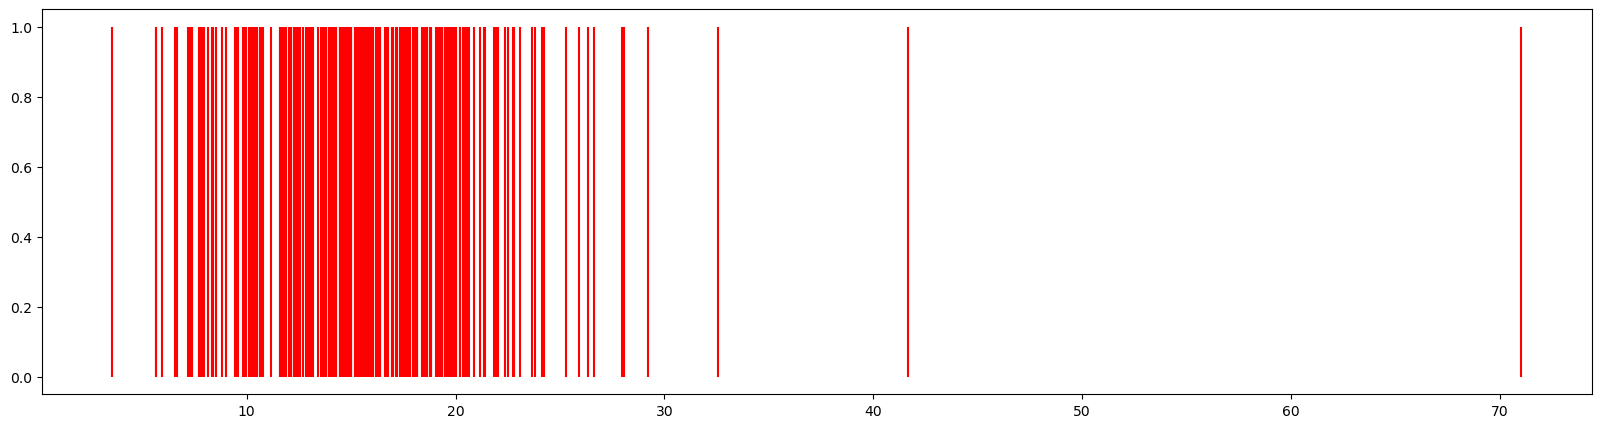

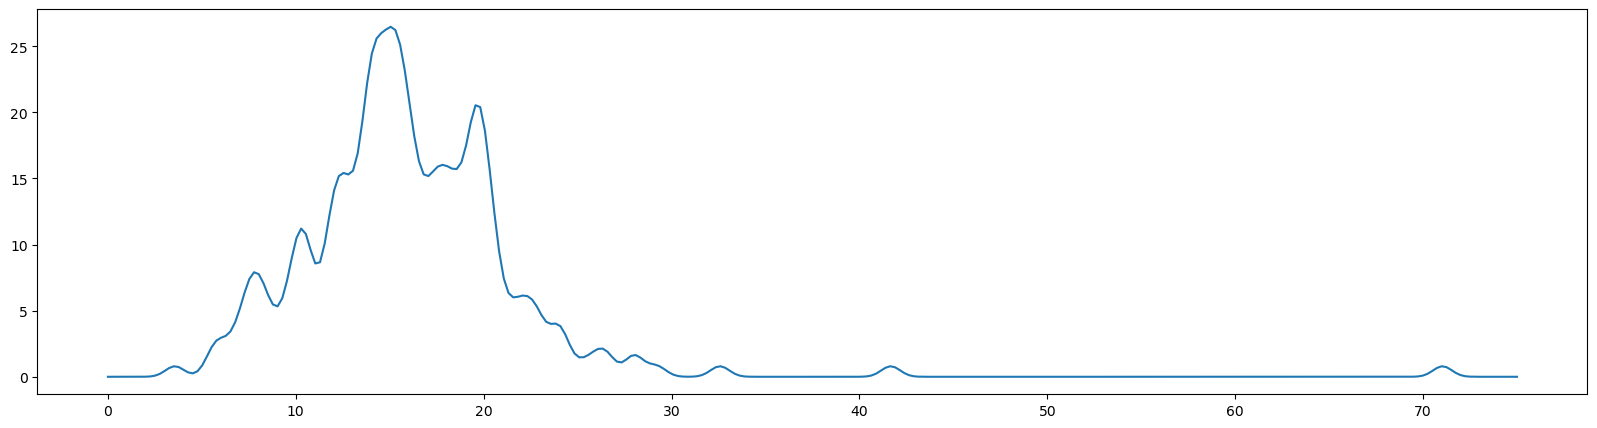

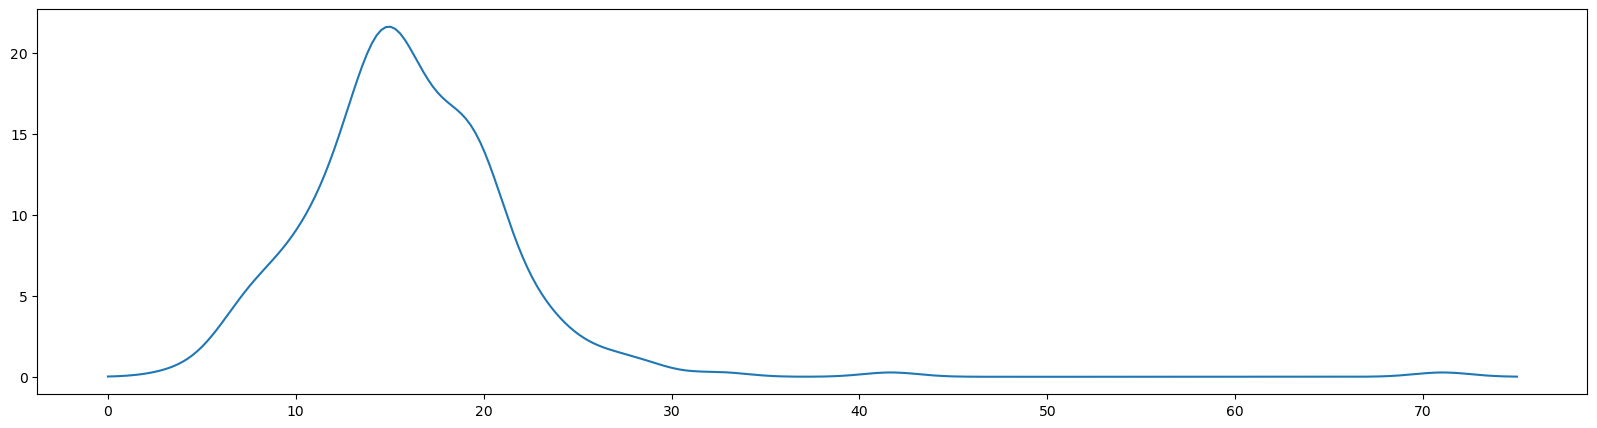

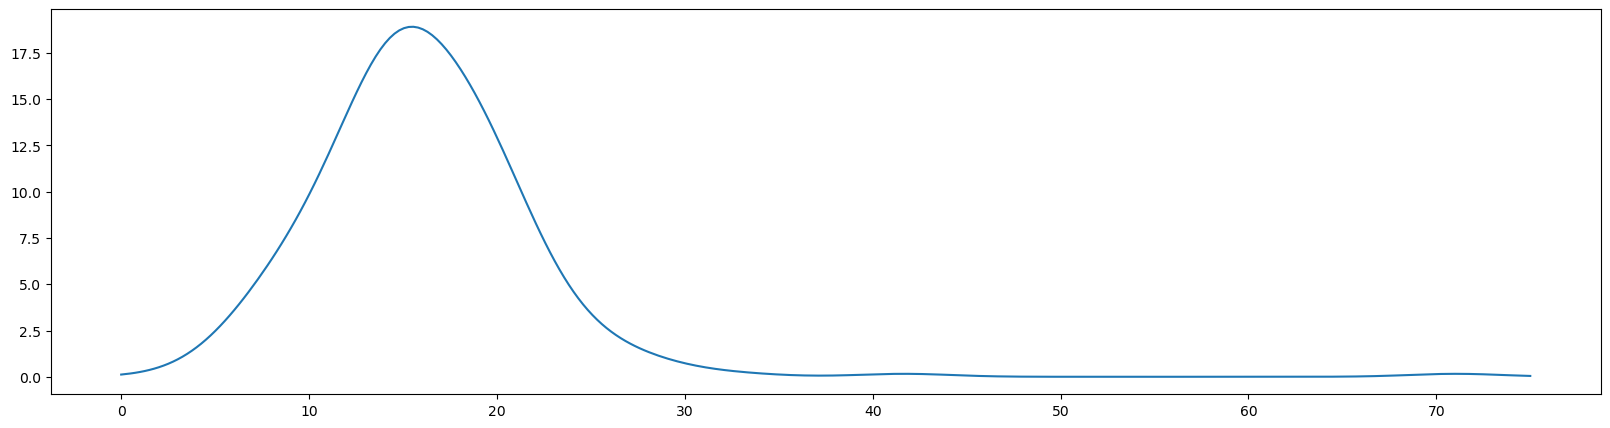

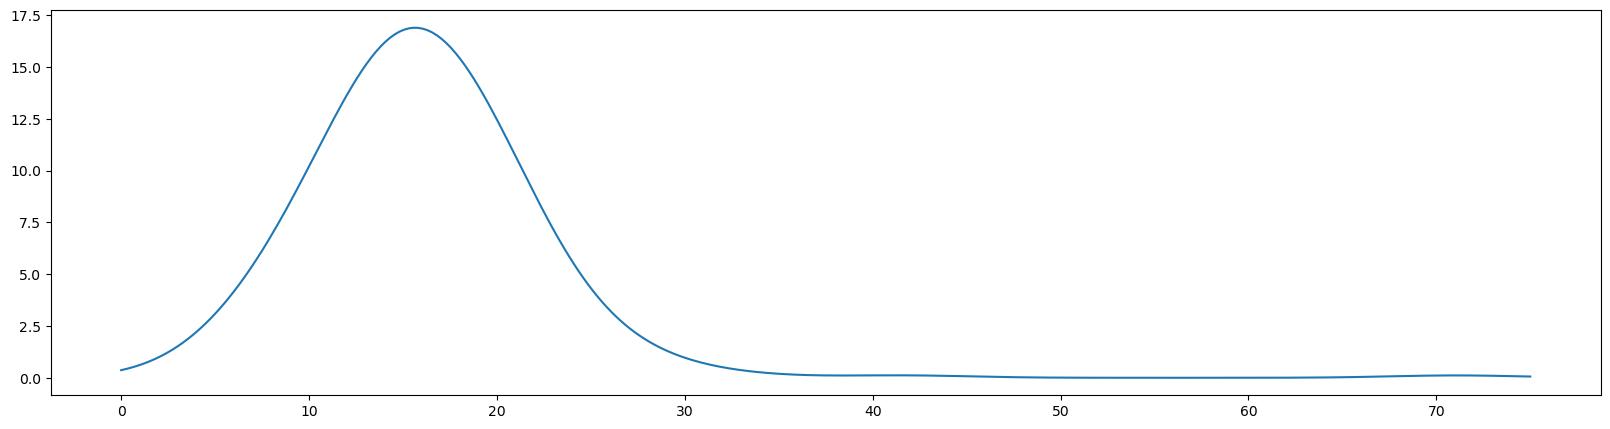

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

data = sns.load_dataset('tips')

data['percentage'] = data['tip'] / data['total_bill'] # dividing tip by total bill to get percentage in .xx

working = np.array(data['percentage'])*100 # multiplying by 100 to make it an integer 0-100

plt.figure(figsize=(20,5)) # initializing figure size for plots

plt.vlines(x = working, ymin = 0, ymax = 1, color = 'r', label = 'axvline - % of full height') # vlines plots each occurence, set ymin and max because the line is infinite 

plt.show()

def my_kde(xvalues, p, w): # here we are defining function and inputs to be used for the function
    
    kde = np.zeros(len(xvalues)) # initializing array of zeros with size of xvalues
    
    for x in p: # for loop to iterate through values of p, which is percentage array
        kde += np.exp(-(xvalues - x)**2/(2*w**2))/(w*np.sqrt(2*np.pi)) # adding calculated kde value to kde array
        
    return(kde)

xvals = np.linspace(0,75,num = 300) # initializing range for xvals and amount of spaced in that range

w8 = .5 # global variable for weight to be used in for loop

for x in range(0,4): # iterating through range 0-4 to get 4 different plots and increase weight
    
    use = w8 + x # increasing weight by x to show different weight values
    
    plt.figure(figsize=(20,5)) # creating empty figure with size
    plt.plot(xvals, my_kde(xvals, working, use), label="w=0.5") # plotting figure

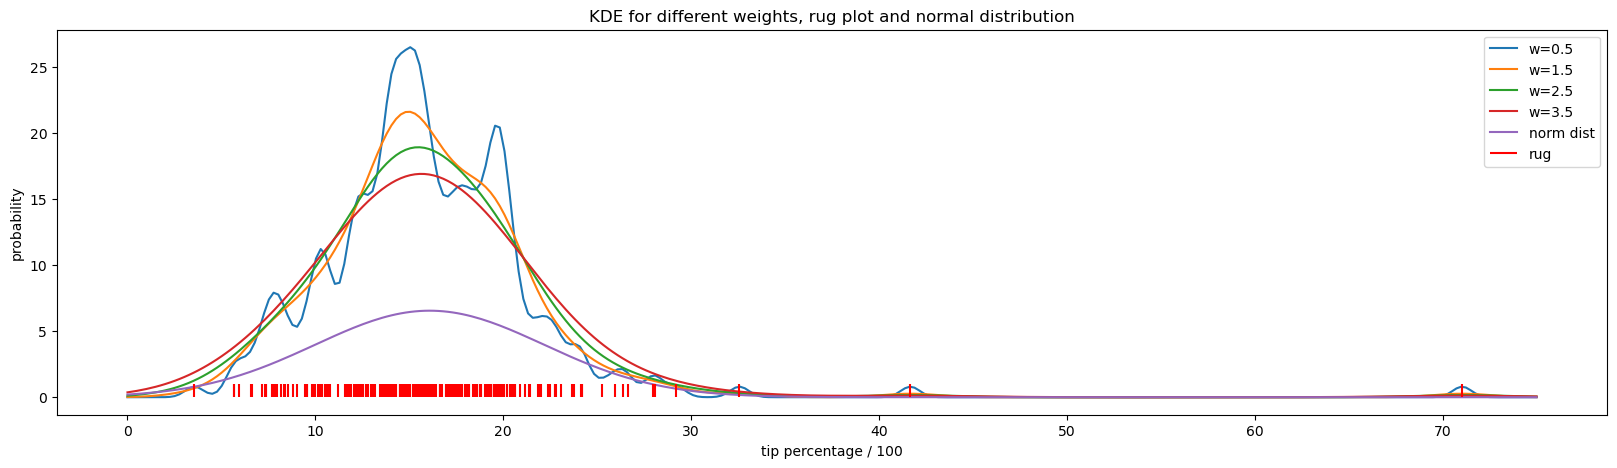

In [2]:
# plotting all on one figure

plt.figure(figsize=(20,5)) # creating empty figure with size
plt.plot(xvals, my_kde(xvals, working, .5), label="w=0.5")
plt.plot(xvals, my_kde(xvals, working, 1.5), label="w=1.5")
plt.plot(xvals, my_kde(xvals, working, 2.5), label="w=2.5")
plt.plot(xvals, my_kde(xvals, working, 3.5), label="w=3.5")
plt.plot(xvals, 100*np.exp(-(xvals - np.mean(working))**2/(2*np.var(working)))/(np.std(working)*np.sqrt(2*np.pi)), label ='norm dist')
plt.vlines(x = working, ymin = 0, ymax = 1, color = 'r',label='rug')

plt.title("KDE for different weights, rug plot and normal distribution")
plt.xlabel("tip percentage / 100")
plt.ylabel("probability")
plt.legend()

# Surface, image and contour plots

using gaussian

$$ p(x) = \frac{1}{w\sqrt{2\pi}}e^{-(x - μ)^2/2w^2}.$$

bivariate gaussian

$$p(x,y) = \frac{1}{w_xw_y 2\pi }e^{-(x - \mu_x)^2/2w_x^2-(y - \mu_y)^2/2w_y^2}.$$

Look at different parameters to see how the plots change

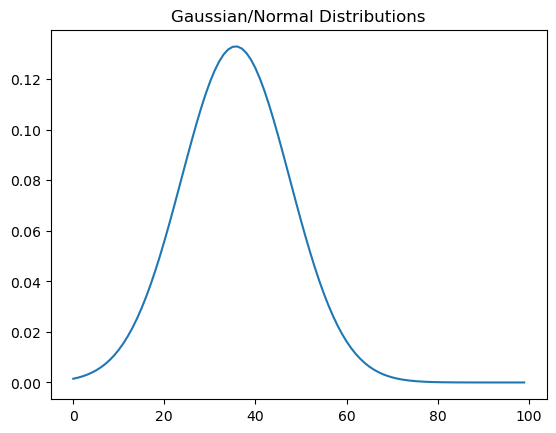

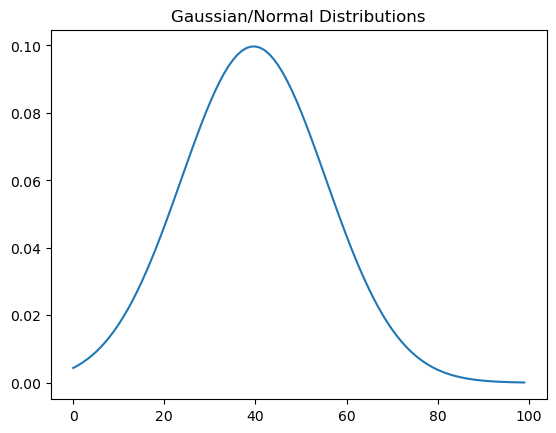

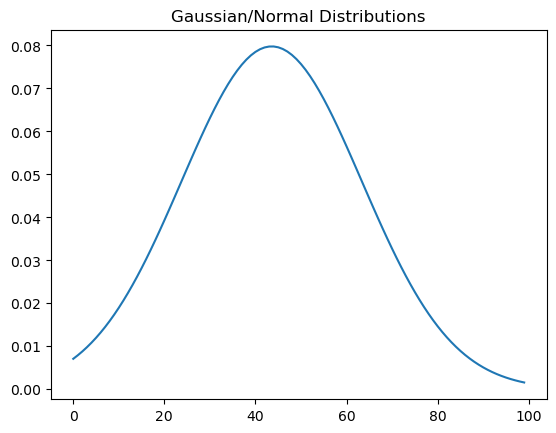

In [3]:
import numpy as np
import matplotlib.pyplot as plt

u = 3
X = np.linspace(-5,20,100) # initializing x range and amount of sections in that range
w = 2

#gaus = (1/(w*np.sqrt(2*np.pi))) * np.exp((-(x-u)**2)/(2*w**2))

#plt.plot(gaus)

for x in range(1,4): 
    plt.figure()
    newu = u + x
    neww = w + x
    newgaus = (1/(neww*np.sqrt(2*np.pi))) * np.exp((-(X-newu)**2)/(2*neww**2))
    plt.title('Gaussian/Normal Distributions')
    plt.plot(newgaus)
    #print(newu, neww)
    
plt.show()

# Lets look at the bivariate in 3d and add contour plot

## All while varying the weights

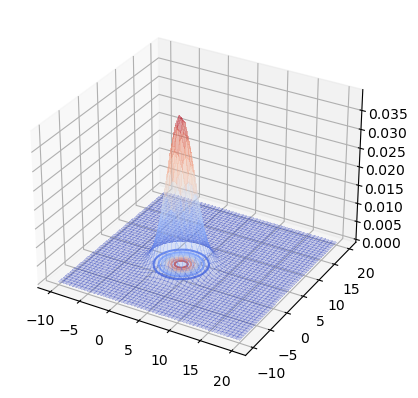

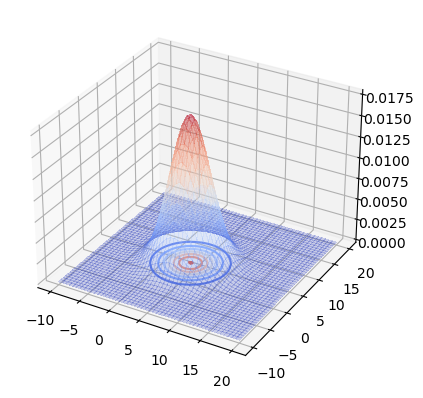

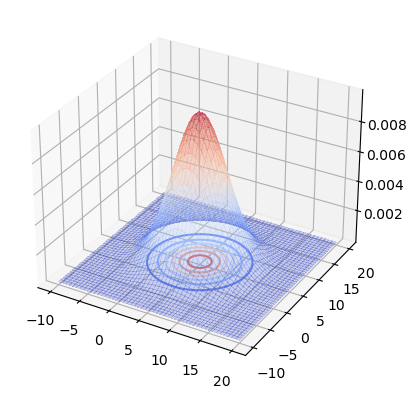

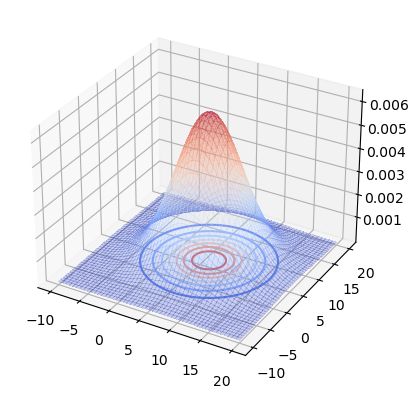

In [4]:
wx = 2
wy = 2
ux = 3
uy = 3

x = np.linspace(-10,20,50)
y = np.linspace(-10,20,50)
X,Y = np.meshgrid(x,y)


gaus = (1/(wx*wy*2*np.pi)) * np.exp(-(X-ux)**2/(2*wx**2) - (Y-uy)**2/(2*wy**2))

#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

for p in range(4):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    newux = ux + p
    newuy = uy + p
    newwx = wx + p 
    newwy = wy + p
    newgaus = (1/(newwx*newwy*2*np.pi)) * np.exp(-(X-newux)**2/(2*newwx**2) - (Y-newuy)**2/(2*newwy**2))
    ax.plot_surface(X,Y,newgaus,cmap = 'coolwarm',alpha = .25,linewidth = 0,antialiased = False)
    ax.contour(X,Y,newgaus,cmap = 'coolwarm',offset=0)
    

    
plt.show()

# Next let's look at contour plot and image

## All while varying the weights

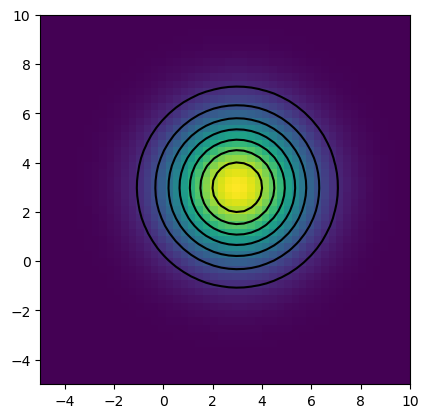

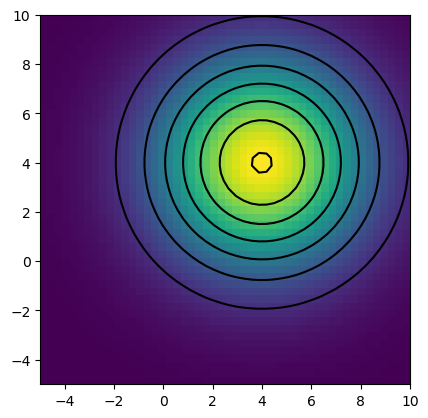

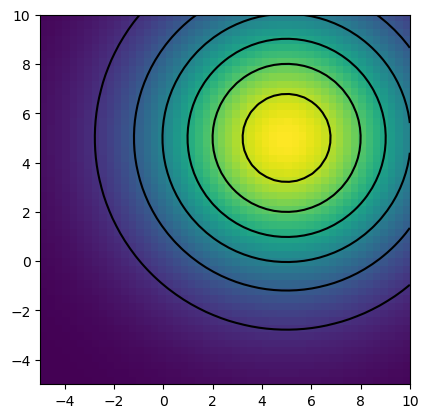

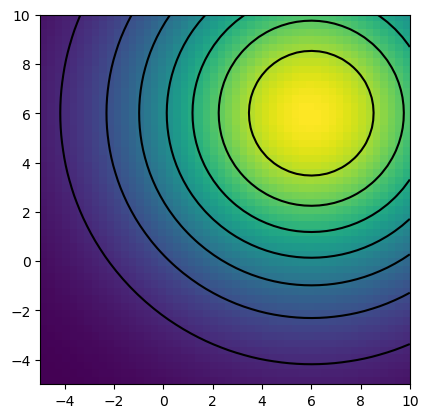

In [5]:
wx = 2
wy = 2
ux = 3
uy = 3

x = np.linspace(-5,10,50)
y = np.linspace(-5,10,50)
X,Y = np.meshgrid(x,y)


gaus = (1/(wx*wy*2*np.pi)) * np.exp(-(X-ux)**2/(2*wx**2) - (Y-uy)**2/(2*wy**2))

#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

for p in range(4):
    fig, ax = plt.subplots()
    newux = ux + p
    newuy = uy + p
    newwx = wx + p 
    newwy = wy + p
    newgaus = (1/(newwx*newwy*2*np.pi)) * np.exp(-(X-newux)**2/(2*newwx**2) - (Y-newuy)**2/(2*newwy**2))
    ax.contour(X,Y,newgaus,colors = 'black')
    ax.imshow(newgaus,extent = [-5,10,-5,10],cmap='viridis',origin='lower') # extent is the bounding box, we want this to be alligned with our numspace to center it
    # origin is controlling how the image fill the bounding box extent, if we change to upper we see that it is off center of our image
plt.show()